## Aflevering 2

In [ ]:
import os
import pandas as pd
file_PE = os.path.join(os.getcwd(),'Elspotprices2nd.csv')
df_prices = pd.read_csv(file_PE)
df_prices["HourUTC"] = pd.to_datetime(df_prices["HourUTC"])
file_P = os.path.join(os.getcwd(),'ProdConData.csv')
df_data = pd.read_csv(file_P)
df_data["HourUTC"] = pd.to_datetime(df_data["HourUTC"])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import Markdown as md
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm
from math import sqrt
import warnings
import numpy as np

warnings.filterwarnings("ignore")

#### Task 1

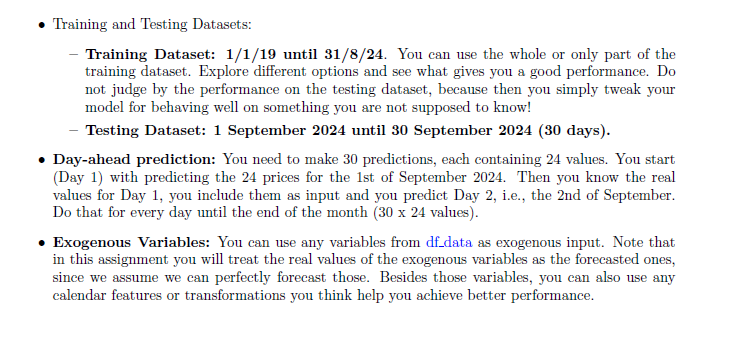

Antager at vi skal starte med at lave ACF og PACF for at finde ud af hvordan vi fitter modellerne

In [ ]:
# Define training and testing periods
train_start = '2019-01-01'
train_start_plot ='2024-08-01'
train_end = '2024-08-31'
test_start = '2024-09-01'
test_end = '2024-09-30'


# Split the data from Elspotprices2nd
train_set_E_plot = df_prices[(df_prices['HourUTC'] >= train_start_plot) & (df_prices['HourUTC'] <= train_end)]
train_set_E = df_prices[(df_prices['HourUTC'] >= train_start) & (df_prices['HourUTC'] <= train_end)]
test_set_E = df_prices[(df_prices['HourUTC'] >= test_start) & (df_prices['HourUTC'] <= test_end)]

# Split the data from ProdConData
train_set_P = df_data[(df_prices['HourUTC'] >= train_start) & (df_data['HourUTC'] <= train_end)]
test_set_P = df_data[(df_prices['HourUTC'] >= test_start) & (df_data['HourUTC'] <= test_end)]
n = len(train_set_E['SpotPriceDKK'])
N = len(df_prices['SpotPriceDKK'])
print(train_set_E)

                  HourUTC  SpotPriceDKK
0     2019-01-01 00:00:00     75.199997
1     2019-01-01 01:00:00    -30.469999
2     2019-01-01 02:00:00    -74.000000
3     2019-01-01 03:00:00    -55.330002
4     2019-01-01 04:00:00    -93.720001
...                   ...           ...
49652 2024-08-30 20:00:00    722.219971
49653 2024-08-30 21:00:00    711.260010
49654 2024-08-30 22:00:00    803.090027
49655 2024-08-30 23:00:00    770.799988
49656 2024-08-31 00:00:00    761.250000

[49657 rows x 2 columns]


Laver ACF og PACF på training data

#### Daily

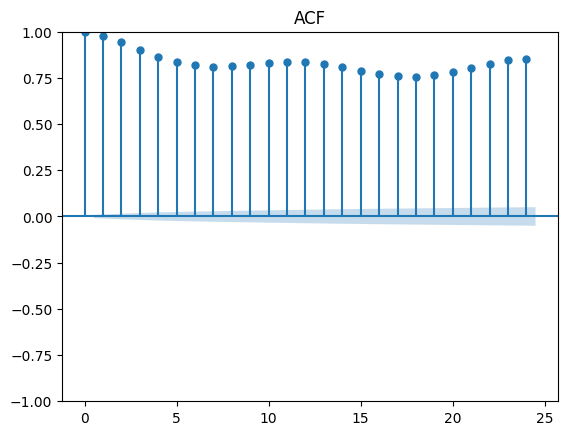

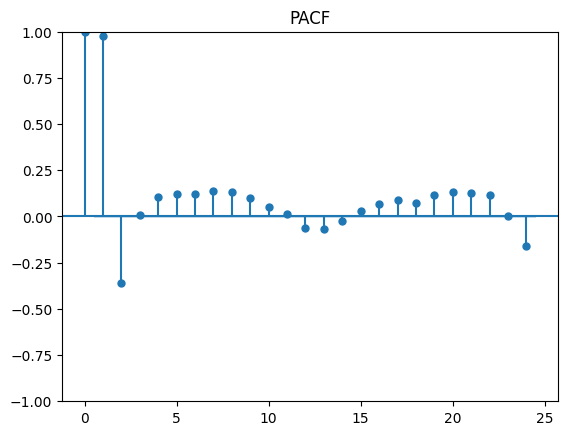

In [ ]:
# Check ACF plot
pm.plot_acf(train_set_E['SpotPriceDKK'], lags=24, title = "ACF", alpha = 0.05);
# Check the PACF plot
pm.plot_pacf(train_set_E['SpotPriceDKK'], method='ywm', lags=24, title = "PACF", alpha = 0.05);


#### Weekly

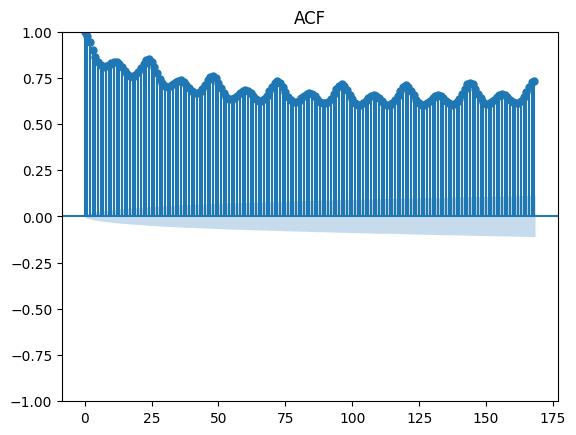

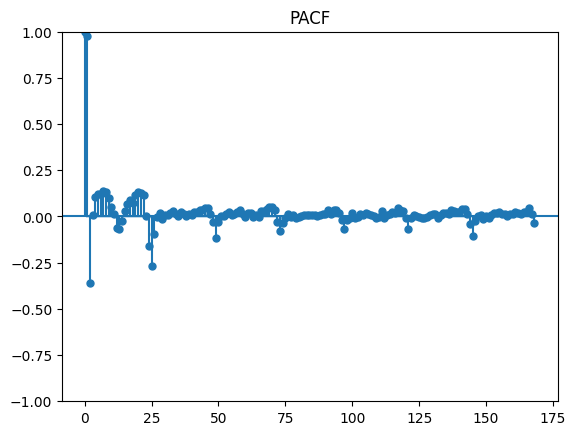

In [ ]:
# Check ACF plot
pm.plot_acf(train_set_E['SpotPriceDKK'], lags=168, title = "ACF", alpha = 0.05);
# Check the PACF plot
pm.plot_pacf(train_set_E['SpotPriceDKK'], method='ywm', lags=168, title = "PACF", alpha = 0.05);


## Task 1

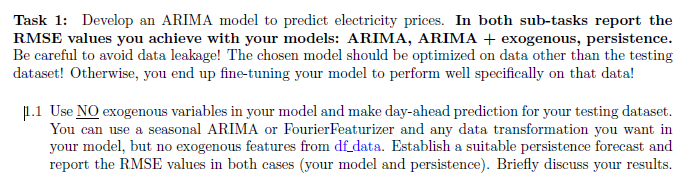

### Leger

Text(0, 0.5, 'x')

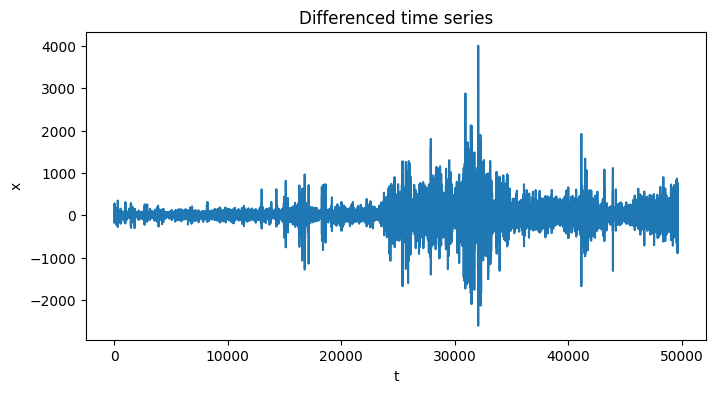

In [ ]:
# Calculate the first difference

train_set_E['Diff'] = train_set_E['SpotPriceDKK'].diff()
diff_data = np.diff(train_set_E['SpotPriceDKK'])

# Plot the result
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Differenced time series")
plt.plot(range(0,n-1), diff_data)
plt.xlabel("t")
plt.ylabel("x")

##### Diff

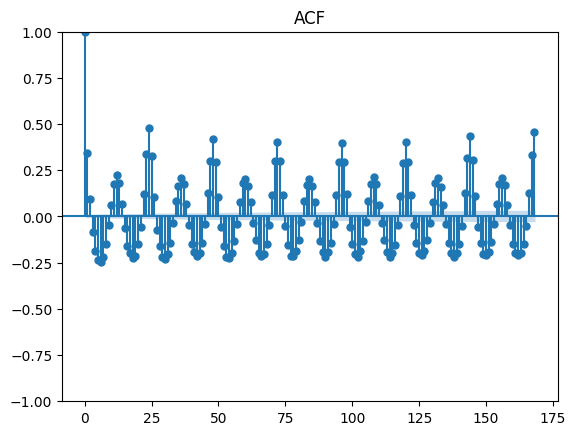

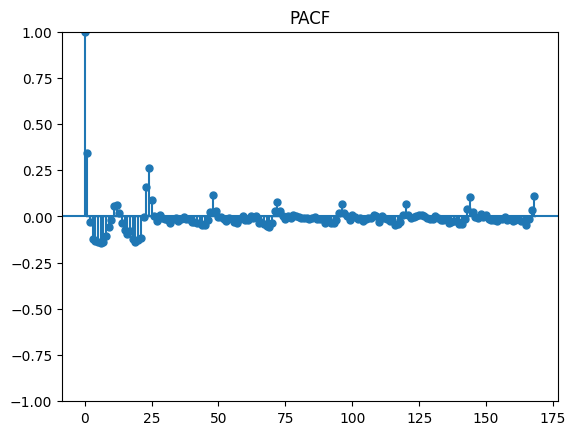

In [ ]:
# Check ACF plot
pm.plot_acf(diff_data, lags=168, title = "ACF", alpha = 0.05);
# Check the PACF plot
pm.plot_pacf(diff_data, method='ywm', lags=168, title = "PACF", alpha = 0.05);


In [ ]:
diff_data_diff = np.diff(diff_data)

## måske

#### Auto modeller

In [ ]:
model = pm.auto_arima(train_set_E['SpotPriceDKK'], trace = True, seasonal = False, stepwise=True, maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=630314.123, Time=11.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=637439.189, Time=0.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=631178.367, Time=1.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=631828.683, Time=3.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=637437.190, Time=0.45 sec


KeyboardInterrupt: 

In [ ]:
model1 = pm.auto_arima(train_set_E['SpotPriceDKK'], trace = True, seasonal = True, stepwise=True, maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=630314.123, Time=6.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=637439.189, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=631178.367, Time=0.71 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=631828.683, Time=1.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=637437.190, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=629561.749, Time=6.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=630923.452, Time=5.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=631157.992, Time=2.86 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=630299.050, Time=10.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=630984.610, Time=6.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=630016.340, Time=8.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=630872.293, Time=9.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=629559.696, Time=3.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=630921.452, Time=2.62 sec
 ARI

In [ ]:
model2 = pm.auto_arima(diff_data, trace = True, seasonal = False, stepwise=True, maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=630308.848, Time=3.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=637437.190, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=631176.363, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=631826.680, Time=0.78 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=629559.692, Time=3.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=630921.447, Time=2.55 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=631155.988, Time=1.16 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=630297.030, Time=4.70 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=630982.605, Time=2.83 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=630014.335, Time=3.60 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=630870.289, Time=4.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=629561.745, Time=6.20 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 32.996 seconds


In [ ]:
model2 = pm.auto_arima(diff_data, 
                       trace = True, 
                       seasonal = True, 
                       stepwise=True, 
                       maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=630314.157, Time=6.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=637439.189, Time=0.49 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=631178.363, Time=0.58 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=631828.680, Time=1.62 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=637437.190, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=629561.745, Time=6.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=630923.447, Time=4.84 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=631157.988, Time=2.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=630299.043, Time=8.49 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=630984.605, Time=5.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=630016.337, Time=6.60 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=630872.290, Time=7.52 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=629559.692, Time=3.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=630921.447, Time=2.54 sec
 ARIM

ARIMA(1,0,2) på diff data er det bedste. Dette kan også ses ved 

#### Task 1,1

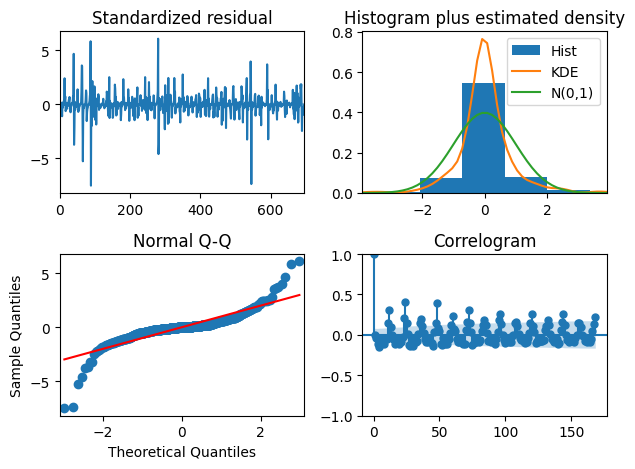

Summary of differentiated data
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  697
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -4582.311
Date:                Tue, 18 Mar 2025   AIC                           9174.623
Time:                        14:37:41   BIC                           9197.349
Sample:                             0   HQIC                          9183.410
                                - 697                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5264     15.710     -0.034      0.973     -31.317      30.264
ar.L1         -0.2127      1.024     -0.208      0.835      -2.220       1.794
ma.L1          0.6107

In [ ]:
model = pm.arima.ARIMA(order=(1, 1, 2))
model.fit(test_set_E['SpotPriceDKK'])
model_diagnostics = model.plot_diagnostics(lags=168, fig=plt.figure())
plt.tight_layout()
plt.show()
print("Summary of differentiated data")
print(model.summary())

In [ ]:
def Forecaster(data):
    """
    data: the data to be used in the form of an array
    n -> share of training dataset [0,1]
    d -> d order of the model, set to None if auto_arima is to optimize its value
    """

    train = train_set_E['SpotPriceDKK']
    test = test_set_E['SpotPriceDKK']

    frc_values = []
    # Fit the model
    model = pm.arima.ARIMA(order=(1, 1, 2))

    #print(model.summary())


    model.fit(train) #træner med mine træningsdata - giver en model
    
    model_diagnostics = model.plot_diagnostics(lags=168, fig=plt.figure())
    # plt.tight_layout()
    # plt.show()
    
    # Perform the forecasts
    for k in range(len(test)):
        m = model.predict(1)[0]
        frc_values.append(m)
        model.update(test[k])


    # Plot the result
    plt.figure(figsize=(8, 4), dpi=100)
    plt.plot(range(0,len(train)), train)
    plt.plot(range(len(train)+1,len(data)+1), test)
    plt.plot(range(len(train)+1,len(data)+1), frc_values)
    plt.xlim([len(train)-50,len(data)])
    plt.xlabel("t")
    plt.xlabel("x")
    plt.legend(["Historical data", "Real values", "Forecasted values"])
    plt.tight_layout()
    plt.show()

    # Plot the training set, testing set and forecasted values

    # Calculate error metrics
    rmse_AR = sqrt(mean_squared_error(test, frc_values)) #så lav som muligt - hvis der skal sammenlignes modeller
    MAE_AR = mean_absolute_error(test, frc_values)

    print("The model gives an RMSE of", float("{:.3f}".format(rmse_AR)))
    print("The model gives an MAE of", float("{:.3f}".format(MAE_AR)))

    # Do further analysis


In [ ]:
frc_values = []
train = train_set_E['SpotPriceDKK'].values[1:168]
test = test_set_E['SpotPriceDKK'].values[1:168]

model =pm.arima.ARIMA(order=(1, 1, 2)) 
model.fit(train)

 
for k in range(len(test)):
    m = model.predict(1)[0]
    frc_values.append(m)
    model.update(test[k])

rmse_AR = sqrt(mean_squared_error(test, frc_values))
MAE_AR = mean_absolute_error(test, frc_values)

print("The model gives an RMSE of", float("{:.3f}".format(rmse_AR)))
print("The model gives an MAE of", float("{:.3f}".format(MAE_AR)))

The model gives an RMSE of 237.187
The model gives an MAE of 122.82


In [ ]:
train = train_set_E['SpotPriceDKK'].values
test = test_set_E['SpotPriceDKK'].values
data = df_prices['SpotPriceDKK'].values
train_plot = train_set_E_plot['SpotPriceDKK'].values
data_nu = train_plot + test

In [ ]:
def Forecaster1(data):
    
    # Split the dataset into training and testing dataset
    frc_values = []
    model =pm.arima.ARIMA(order=(1, 1, 2)) 
    model.fit(train)
    
    # Perform the forecasts
    for k in range(len(test)):
        m = model.predict(1)[0]
        frc_values.append(m)
        model.update(test[k])

    # Calculate error metrics
    residuals = result = [a - b for a, b in zip(test, frc_values)]
    rmse_AR = sqrt(mean_squared_error(test, frc_values))
    MAE_AR = mean_absolute_error(test, frc_values)
    print("The model gives an RMSE of", float("{:.3f}".format(rmse_AR)))
    print("The model gives an MAE of", float("{:.3f}".format(MAE_AR)))

    # Plot the forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train)), train, label="Historical data")
    plt.plot(range(len(train), len(train) + len(test)), test, label="Real values")
    plt.plot(range(len(train), len(train) + len(test)), frc_values, label="Forecasted values")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.xlim(45000, len(data))
    # plt.ylim(45000, len(data))
    plt.title("Forecasting Performance")
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Plot the forecasts
    # plt.figure(figsize=(8,4), dpi = 100)
    # plt.plot(range(0,len(train)), train)
    # plt.plot(range(len(train)+1,len(data)+1), test)
    # plt.plot(range(len(train)+1,len(data)+1), frc_values)
    # plt.xlim([len(train)-50,len(data)])
    # plt.xlabel("t")
    # plt.ylabel("x")
    # plt.title("Forecasting performance")
    # plt.legend(["Historical data", "Real values", "Forecasted values"])
    # plt.tight_layout()
    # plt.show()
    # Plot the residuals (forecasting errors)
    # plt.figure()
    # plt.plot(range(0,len(residuals)), residuals)
    # plt.title("Forecasting errors")
    # plt.xlabel("t")
    # plt.ylabel("residual")
    # plt.tight_layout()
    # plt.show()    

In [ ]:
Forecaster1(data)

The model gives an RMSE of 168.886
The model gives an MAE of 98.456


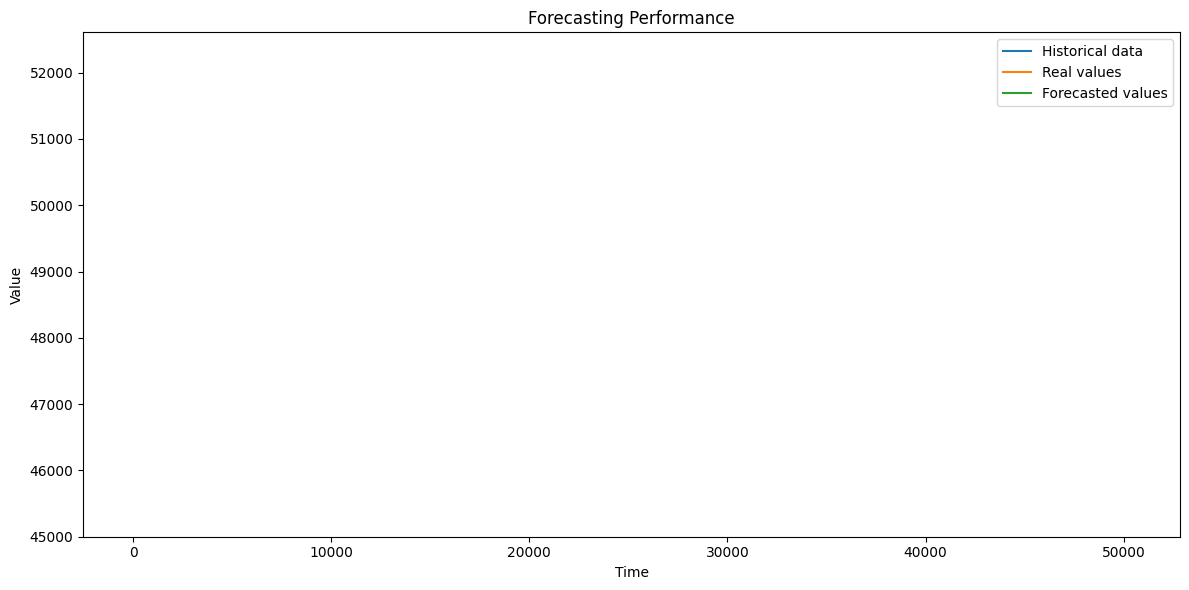

In [ ]:
Forecaster1(data)

The model gives an RMSE of 168.964
The model gives an MAE of 98.665


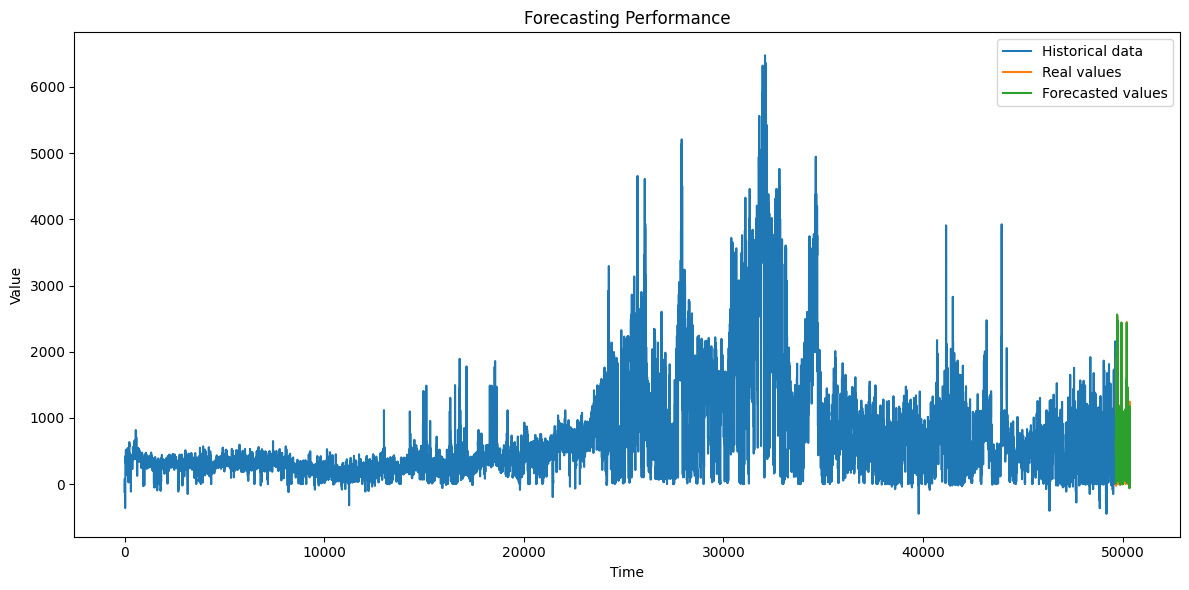

In [ ]:
Forecaster1(data)